In [1]:
"This demo shows Regression on simple datasets"

# command to let jupyter plot things inline
%matplotlib inline

# Numpy is a python library for scientific computing
import numpy as np
# library that allows us to write shell commands in python
import os
# library to generate plots, works as matlab, but needs to be called in the "plt" alias
import matplotlib.pyplot as plt

# NEW!!!
# library with datasets and other stats perks
from sklearn import datasets, linear_model

# library to import comma separated value (csv) files
import csv

shape of features is  (442, 10)
shape of targets is  (442,)
shape of train_data is  (400,)


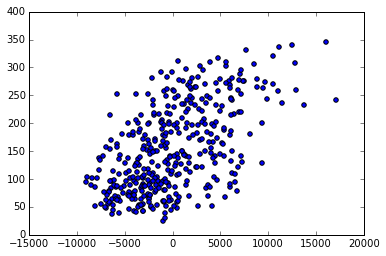

In [17]:
# load a "diabetes" dataset
diabetes = datasets.load_diabetes()

# this is a dictonary, and we want to get 'data' and 'targets'
features = diabetes['data']
targets = diabetes['target']

print 'shape of features is ', features.shape
print 'shape of targets is ', targets.shape

# separate training and test data
train_data = features[:-42]
test_data = features[-42:]

train_targets = targets[:-42]
test_targets = targets[-42:]

# select one of the features
feat_selected = 2

train_data = train_data[:,feat_selected]
test_data = test_data[:,feat_selected]
print 'shape of train_data is ', train_data.shape 

#scale the feature we selected
feat_scaled = (train_data*100000).astype(int)
test_feat_scaled = (test_data*100000).astype(int)

# let's plot the data!
plt.scatter(feat_scaled, train_targets)

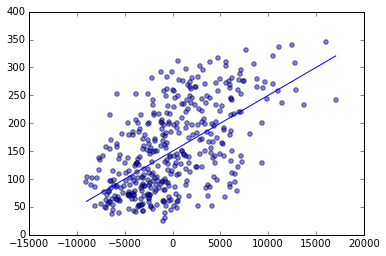

In [18]:
# generate a line to plot agains the data


# x axis to plot
x = range(np.min(feat_scaled), np.max(feat_scaled) + 1)

# generate a regression line
B_0 = 150
B_1 = 0.01

reg_line = B_0 + B_1*np.array(x)

# plot the regression line
plt.plot(x,reg_line)
# plot the data
plt.scatter(feat_scaled, train_targets, alpha=0.5)
plt.show()

In [19]:
# let's make it bullet proof
# by calculating the RSS

num_samples = feat_scaled.shape[0]

RSS = 0

for iTarget in range(num_samples):
    # find the index where a value is found in x
    x_index = np.where(x == feat_scaled[iTarget])
    
    # calculate the RSS
    RSS = RSS + (train_targets[iTarget] - reg_line[x_index])**2
    
print'The Residual Sum of Squares is ', RSS


The Residual Sum of Squares is  [ 1592145.4067]


In [21]:
# Train the model using the training sets
reg = linear_model.LinearRegression()

train_data = feat_scaled[:,np.newaxis]

reg.fit(train_data,train_targets)

print('Intercept: ', reg.intercept_)
print('Coefficient: ', reg.coef_)

# The mean square error
value = np.sum((reg.predict(train_data) - train_targets) ** 2) 
print("Residual sum of squares on train (does this make sense at all?): %.2f"
      % value)

test_data = test_feat_scaled[:,np.newaxis]
test_value = np.sum((reg.predict(test_data) - test_targets) ** 2)
print("Test RSS is ", test_value)




('Intercept: ', 152.99975196208192)
('Intercept: ', array([ 0.00955774]))
Residual sum of squares on train (does this make sense at all?): 1586784.46
('Test RSS is ', 133182.86881210597)


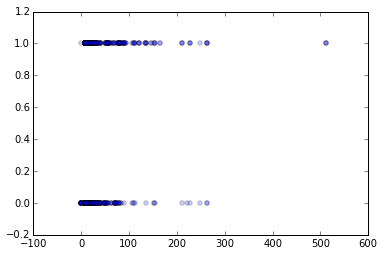

In [32]:
# carry out logistic classification on the 'titanic dataset'

# load the data
titanic_csv = csv.reader(open('train.csv', 'rb'))
header = titanic_csv.next()

# generate the numpy array that we will work with
titanic_data=[]
for row in titanic_csv:
    titanic_data.append(row)
titanic_data = np.array(titanic_data)
    
# grab only the feature that we will deal with
target_column = 1
fare_price_column = 9
data =  titanic_data[:,fare_price_column]
targets =  titanic_data[:,target_column]

plt.scatter(data,targets, alpha = 0.2)



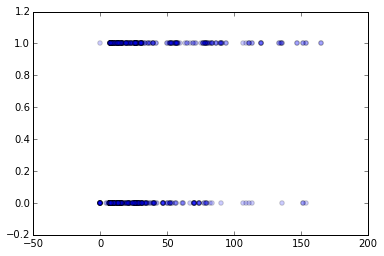

In [33]:
# get rid of outliers

# count number of passengers
num_passengers = 0
for passenger in xrange(titanic_data.shape[0]):
    if titanic_data[passenger,9].astype(float) < 200:
        num_passengers = num_passengers + 1
        
# eliminate them
iRow = 0        
while iRow < num_passengers:
    if titanic_data[iRow,9].astype(float) > 200:
        titanic_data = np.delete(titanic_data, (iRow), axis = 0)
        iRow = iRow - 1
    else:
        iRow = iRow + 1
        
# grab only the feature that we will deal with
target_column = 1
fare_price_column = 9
data =  titanic_data[:,fare_price_column]
targets =  titanic_data[:,target_column]

plt.scatter(data,targets, alpha = 0.2)

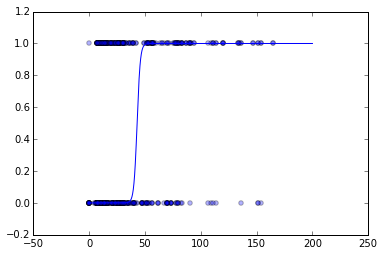

In [34]:
# generate sigmoidal function

x = np.linspace(0,200,1000)

B_0 = 30
B_1 = 0.7

# play with parameters to engage students
sigmoid = 1/(1+np.exp(-(-B_0+B_1*x)))
plt.plot(x,sigmoid)
plt.scatter(data,targets, alpha=0.3)
plt.show()

(' Intercept is ', array([-1.10193177]))
(' Coefficient is ', array([[ 0.02250115]]))


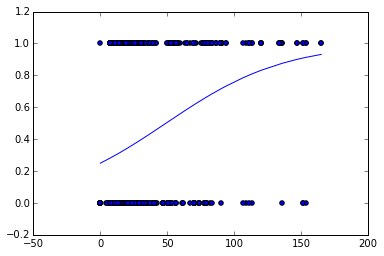

In [44]:
# logistic regression with Scikit learn

# data is stored in 'data' and the classes are stored in 'targets'

data_for_scikit = data[:,np.newaxis]

# run the classifier
clf = linear_model.LogisticRegression()
clf.fit(data_for_scikit,targets)

print(' Intercept is ', clf.intercept_)
print(' Coefficient is ', clf.coef_)

plt.scatter(data_for_scikit, targets)

data_for_scikit = data_for_scikit.astype(np.float)

sorted_data = np.sort(data_for_scikit, axis = 0)

sigmoid_fit = 1 / (1+np.exp(-(clf.intercept_ + sorted_data*clf.coef_)))

plt.plot(sorted_data,sigmoid_fit)


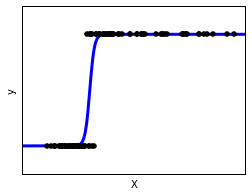

In [47]:
# from Scikit learn website

# this is our test set, it's just a straight line with some
# Gaussian noise
xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(np.float)
X[X > 0] *= 4
X += .3 * np.random.normal(size=n_samples)

X = X[:, np.newaxis]
# run the classifier
clf = linear_model.LogisticRegression(C=1e5)
clf.fit(X, y)

# and plot the result
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.scatter(X.ravel(), y, color='black', zorder=20)
X_test = np.linspace(-5, 10, 300)


def model(x):
    return 1 / (1 + np.exp(-x))
loss = model(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color='blue', linewidth=3)

# # Uncomment
# # If you want to see what would happen with a linear regression fit
# ols = linear_model.LinearRegression()
# ols.fit(X, y)
# plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
# plt.axhline(.5, color='.5')

plt.ylabel('y')
plt.xlabel('X')
plt.xticks(())
plt.yticks(())
plt.ylim(-.25, 1.25)
plt.xlim(-4, 10)

plt.show()

In [51]:
# This bit of code shows you how to load the MNIST dataset,
# the mnist-data. Do not do your homework here!!!!!!!. Copy
# and paste this code to a fresh jupyter notebook

from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', data_home='.')

In [56]:
data = mnist['data']

# print 'mnist is:', mnist, ' and data is: ', data

print 'shape of data is: ', data.shape

shape of data is:  (70000, 784)


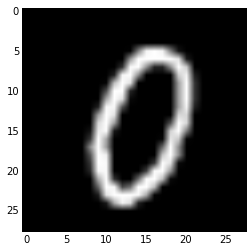

In [71]:
image_ex = data[60030].reshape(28,28)

plt.imshow(image_ex, cmap='Greys_r')
